In [14]:
import pandas as pd
import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical 

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(10)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


In [3]:
df.columns


Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [4]:
selected_features = df[['koi_fpflag_co',
         'koi_period', 'koi_period_err1', 
       'koi_time0bk', 'koi_time0bk_err1', 'koi_impact',
       'koi_impact_err1', 'koi_duration',
       'koi_duration_err1', 'koi_depth', 'koi_depth_err1',
       'koi_prad', 'koi_prad_err1', 
       'koi_teq', 'koi_insol', 'koi_insol_err1', 
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
        'koi_slogg', 'koi_slogg_err1', 
       'koi_srad', 'koi_srad_err1', 'ra', 'dec',
       'koi_kepmag']]
selected_features

,koi_fpflag_co,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_impact,koi_impact_err1,koi_duration,koi_duration_err1,koi_depth,...,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_srad,koi_srad_err1,ra,dec,koi_kepmag
0,0,54.418383,2.479000e-04,162.513840,0.003520,0.586,0.059,4.50700,0.11600,874.8,...,2,5455,81,4.467,0.064,0.927,0.105,291.93423,48.141651,15.347
1,0,19.899140,1.490000e-05,175.850252,0.000581,0.969,5.126,1.78220,0.03410,10829.0,...,1,5853,158,4.544,0.044,0.868,0.233,297.00482,48.134129,15.436
2,0,1.736952,2.630000e-07,170.307565,0.000115,1.276,0.115,2.40641,0.00537,8079.2,...,1,5805,157,4.564,0.053,0.791,0.201,285.53461,48.285210,15.597
3,0,2.525592,3.760000e-06,171.595550,0.001130,0.701,0.235,1.65450,0.04200,603.3,...,1,6031,169,4.438,0.070,1.046,0.334,288.75488,48.226200,15.509
4,0,4.134435,1.050000e-05,172.979370,0.001900,0.762,0.139,3.14020,0.06730,686.0,...,2,6046,189,4.486,0.054,0.972,0.315,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,8.589871,1.846000e-04,132.016100,0.015700,0.765,0.023,4.80600,0.63400,87.7,...,1,5638,169,4.296,0.231,1.088,0.313,298.74921,46.973351,14.478
6987,1,0.527699,1.160000e-07,131.705093,0.000170,1.252,0.051,3.22210,0.01740,1579.2,...,1,5638,139,4.529,0.035,0.903,0.237,297.18875,47.093819,14.082
6988,0,1.739849,1.780000e-05,133.001270,0.007690,0.043,0.423,3.11400,0.22900,48.5,...,1,6119,165,4.444,0.056,1.031,0.341,286.50937,47.163219,14.757
6989,1,0.681402,2.430000e-06,132.181750,0.002850,0.147,0.309,0.86500,0.16200,103.6,...,1,6173,193,4.447,0.056,1.041,0.341,294.16489,47.176281,15.385


In [5]:
target = df["koi_disposition"]
target.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_train_scaled.shape)
print(y_train.shape)  

(5243, 27)
(5243,)


In [12]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


array([0, 2, 2, ..., 2, 2, 2])

In [16]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_train_categorical

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=27))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 13,203
Trainable params: 13,203
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
164/164 - 0s - loss: 0.3903 - accuracy: 0.8308
Epoch 2/100
164/164 - 0s - loss: 0.3834 - accuracy: 0.8362
Epoch 3/100
164/164 - 0s - loss: 0.3826 - accuracy: 0.8364
Epoch 4/100
164/164 - 0s - loss: 0.3866 - accuracy: 0.8341
Epoch 5/100
164/164 - 0s - loss: 0.3848 - accuracy: 0.8350
Epoch 6/100
164/164 - 0s - loss: 0.3783 - accuracy: 0.8375
Epoch 7/100
164/164 - 0s - loss: 0.3827 - accuracy: 0.8331
Epoch 8/100
164/164 - 0s - loss: 0.3799 - accuracy: 0.8362
Epoch 9/100
164/164 - 0s - loss: 0.3776 - accuracy: 0.8394
Epoch 10/100
164/164 - 0s - loss: 0.3793 - accuracy: 0.8419
Epoch 11/100
164/164 - 0s - loss: 0.3728 - accuracy: 0.8413
Epoch 12/100
164/164 - 0s - loss: 0.3720 - accuracy: 0.8409
Epoch 13/100
164/164 - 0s - loss: 0.3761 - accuracy: 0.8362
Epoch 14/100
164/164 - 0s - loss: 0.3748 - accuracy: 0.8447
Epoch 15/100
164/164 - 0s - loss: 0.3760 - accuracy: 0.8405
Epoch 16/100
164/164 - 0s - loss: 0.3668 - accuracy: 0.8440
Epoch 17/100
164/164 - 0s - loss: 0.3660 - accura

In [23]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.5682 - accuracy: 0.7866
Normal Neural Network - Loss: 0.5681865811347961, Accuracy: 0.7866132855415344


In [24]:
#Make Predictions
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['CANDIDATE' 'CANDIDATE' 'FALSE POSITIVE' 'FALSE POSITIVE'
 'FALSE POSITIVE']
Actual Labels: ['FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE']


In [26]:
model.save("deep_learning.h5")

In [27]:
from tensorflow.keras.models import load_model
model = load_model("deep_learning.h5")

In [ ]:
#try KNN classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k: 1, Train/Test Score: 1.000/0.642
k: 3, Train/Test Score: 0.812/0.658
k: 5, Train/Test Score: 0.778/0.661
k: 7, Train/Test Score: 0.755/0.674
k: 9, Train/Test Score: 0.749/0.679
k: 11, Train/Test Score: 0.735/0.685
k: 13, Train/Test Score: 0.724/0.685
k: 15, Train/Test Score: 0.714/0.695
k: 17, Train/Test Score: 0.710/0.690
k: 19, Train/Test Score: 0.708/0.678
k: 21, Train/Test Score: 0.706/0.680
k: 23, Train/Test Score: 0.709/0.679
k: 25, Train/Test Score: 0.702/0.682
k: 27, Train/Test Score: 0.701/0.678
k: 29, Train/Test Score: 0.698/0.681


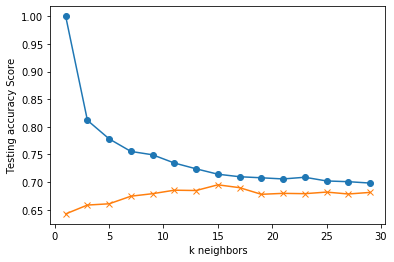

In [29]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.683


In [36]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=23 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=23 Test Acc: 0.690
